# The Price of Life – Analyzing the Efficiency of Global Healthcare Spending

## 1. Objective and Research Question
<b>Research Question:</b> Is there any correlation between Healthcare Spending and Life Expectancy?
<p> In public policy, "Allocative Efficiency" is an important topic. Governments must decide how much of their money to spend on public health versus infrastructure or education.  Intuitively, we anticipate a positive correlation: increased resources (hospitals, doctors, and medicine) should result in better health outcomes. However, I believe the relationship between those two is nonlinear and follows the Law of Diminishing Marginal Returns.  While greater spending, in theory, will benefit developing countries, developed countries may experience a "plateau" in which additional spending yields only small gains in longevity. </p>

## 2. Data Sources
To investigate this, I merged two datasets from the World Bank Open Data portal:
1. [Current Health Expenditure (% of GDP)](https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS): The level of total health expenditure expressed as a percentage of the country's Gross Domestic Product.
2. [Life Expectancy at Birth (Total Years)](https://data.worldbank.org/indicator/SP.DYN.LE00.IN): The average number of years a newborn is expected to live if mortality patterns at the time of birth remain constant.

### 2.1 Data Cleaning
#### 2.1.1 Health Expenditure
NB: Since I don't know how to skip rows in pandas, I need to delete the first 5 rows in MS Excel because the header starts at row #6, so pandas can read the file.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

health = pd.read_csv("world_health_expenditure_ed.csv")
health.sample(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Lebanon,LBN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.415967,7.923861,7.803966,8.070924,8.693678,7.576508,4.856347,5.735002,NaN,NaN
79,"Micronesia, Fed. Sts.",FSM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.704853,13.416047,12.468863,11.965520,11.893085,12.015375,11.413218,10.344703,NaN,NaN
144,Luxembourg,LUX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.081136,5.071039,5.135354,5.279885,5.464958,5.764881,5.660656,5.551548,5.782841,NaN
239,Tonga,TON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.667621,5.086161,5.491196,5.987120,5.423945,5.562595,7.632867,8.136076,NaN,NaN


<p> As we can see from table above, many countries data start in the year 2000. Therefore, we should drop the column before 2000. Additionally, we should also drop the data from 2023-2024 because many countries data are missing </p>

In [60]:
years_to_drop = [str(year) for year in range(1960, 2000)]
# Dropping 2023 - 2024 because the data is not complete, some country have it but some other have not.
years_to_drop.extend(["2023", "2024"])

health = health.drop(columns=years_to_drop, errors="ignore")
health.sample(5)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
85,Guinea,GIN,4.740973,4.884330,5.356537,4.772165,4.776328,4.034527,3.615269,3.482625,...,3.461087,4.787992,5.809193,5.396949,3.915127,3.738430,4.088762,3.900945,3.717586,3.958477
176,Netherlands,NLD,7.706960,8.059459,8.649132,9.056571,9.110765,9.096668,9.080551,9.052926,...,10.583636,10.567038,10.323938,10.056795,10.108298,10.019936,10.140396,11.223557,11.124907,10.100683
178,Nepal,NPL,3.132921,3.812299,3.938633,3.856073,4.046299,3.950953,3.544024,3.672975,...,4.630130,5.075494,5.466156,5.423790,4.721710,4.528084,4.445247,5.208096,5.323331,6.655893
88,Equatorial Guinea,GNQ,1.107200,1.203012,2.749822,1.827498,1.452932,1.296430,1.291719,1.301658,...,1.641744,1.754016,2.340582,2.859416,2.747142,2.852237,3.167809,3.995824,3.394681,2.913500
78,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Checking whether the numbers are actual numbers (Integer or Float) or string
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          232 non-null    float64
 3   2001          232 non-null    float64
 4   2002          233 non-null    float64
 5   2003          235 non-null    float64
 6   2004          235 non-null    float64
 7   2005          235 non-null    float64
 8   2006          235 non-null    float64
 9   2007          235 non-null    float64
 10  2008          235 non-null    float64
 11  2009          235 non-null    float64
 12  2010          236 non-null    float64
 13  2011          237 non-null    float64
 14  2012          237 non-null    float64
 15  2013          238 non-null    float64
 16  2014          238 non-null    float64
 17  2015          238 non-null    float64
 18  2016          238 non-null    

In [62]:
# Drop every row with NaN value
health = health.dropna()
health.sample(5)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
131,Liberia,LBR,2.879132,2.279068,2.280360,2.661767,6.338156,7.143222,6.068915,4.327940,...,7.081458,8.762839,10.459497,9.885145,10.449219,10.781972,8.383260,12.905043,13.838443,13.473862
74,Fragile and conflict affected situations,FCS,4.136253,4.485927,4.336377,5.030116,4.823198,4.561467,4.488394,4.449577,...,4.348530,4.303638,4.532198,4.861442,4.800140,4.498581,4.424918,4.899896,5.162065,4.520345
66,Ecuador,ECU,3.482569,3.972544,4.722937,5.701213,5.790411,5.767938,5.845067,5.557225,...,6.778664,6.766018,7.767860,7.588175,7.524841,7.832140,7.807683,8.657625,8.206462,7.534570
221,Slovak Republic,SVK,5.302569,5.331505,5.509476,5.448499,6.371904,6.588700,6.850767,7.177353,...,7.495182,6.884116,6.762152,7.091777,6.756991,6.666399,6.919648,7.126502,7.756247,7.730640
40,China,CHN,4.508281,4.253301,4.382853,4.417628,4.293475,4.176050,3.947422,3.674914,...,4.714907,4.777906,4.938280,4.979556,5.065922,5.167905,5.350278,5.593597,5.383605,5.369487


In [63]:
# Dropping non-countries from the table
non_countries = [
    "AFE",
    "AFW",
    "ARB",
    "CEB",
    "CSS",
    "EAP",
    "EAR",
    "EAS",
    "ECA",
    "ECS",
    "EMU",
    "EUU",
    "FCS",
    "HIC",
    "HPC",
    "IBD",
    "IBT",
    "IDA",
    "IDB",
    "IDX",
    "LAC",
    "LCN",
    "LDC",
    "LIC",
    "LMC",
    "LMY",
    "LTE",
    "MEA",
    "MIC",
    "MNA",
    "NAC",
    "OED",
    "OSS",
    "PRE",
    "PSS",
    "PST",
    "SAS",
    "SSA",
    "SSF",
    "SST",
    "TEA",
    "TEC",
    "TLA",
    "TMN",
    "TSA",
    "TSS",
    "UMC",
    "WLD",
]

health = health[~health["Country Code"].isin(non_countries)]
health.sample(5)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
100,Haiti,HTI,3.991657,3.750292,3.432501,3.536953,3.429284,3.305547,3.480139,3.647341,...,4.105240,4.520358,5.075181,4.807606,3.819939,4.316503,3.911079,3.221711,3.442162,3.208489
89,Greece,GRC,7.243326,7.987840,8.233780,8.449156,8.093905,8.564670,8.258670,8.398083,...,8.437964,7.891411,8.220045,8.448746,8.135159,8.120243,8.198283,9.524216,9.184765,8.499837
209,Solomon Islands,SLB,4.827789,6.607128,10.106276,7.077247,7.725566,9.017945,8.008022,7.185831,...,4.581572,4.890563,4.448533,4.529529,4.165564,3.864408,4.437281,4.894784,4.947585,4.823693
114,Iceland,ISL,8.899243,8.752662,9.403825,9.729302,9.328544,8.946950,8.557091,8.353586,...,8.226513,8.290442,8.131220,8.155691,8.324308,8.438176,8.639963,9.677807,9.786970,9.285939
206,Sudan,SDN,3.606645,3.364569,3.300109,3.891879,4.155935,4.094182,4.885443,5.662692,...,6.964875,5.676197,5.811126,5.684385,5.917674,4.463583,4.571184,3.009654,2.831278,4.618744


#### 2.1.2 Life Expectancy
NB: Similarly to the health dataset above, I need to delete the first 5 rows in MS Exce, so pandas can read the file.

<p> I repeat the same process of data cleaning as health dataset above. The intention is to get similar data for every country but for Life Expectancy </p>

In [64]:
# Open the dataset using pandas
life = pd.read_csv("world_life_expectancy_ed.csv")

# Use previous list of years to drop
life = life.drop(columns=years_to_drop, errors="ignore")

# Checking whether the numbers are actual numbers (Integer or Float) or string
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          265 non-null    float64
 3   2001          265 non-null    float64
 4   2002          265 non-null    float64
 5   2003          265 non-null    float64
 6   2004          265 non-null    float64
 7   2005          265 non-null    float64
 8   2006          265 non-null    float64
 9   2007          265 non-null    float64
 10  2008          265 non-null    float64
 11  2009          265 non-null    float64
 12  2010          265 non-null    float64
 13  2011          265 non-null    float64
 14  2012          265 non-null    float64
 15  2013          265 non-null    float64
 16  2014          265 non-null    float64
 17  2015          265 non-null    float64
 18  2016          265 non-null    

In [65]:
# Drop every row with NaN value
life = life.dropna()

life = life[~life["Country Code"].isin(non_countries)]
life.sample(5)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
48,Costa Rica,CRI,77.317,77.609,77.939,78.214,78.512,78.877,79.049,79.098,...,80.189,80.231,80.407,79.988,79.994,80.090,80.296,79.725,78.050,79.316
243,Tunisia,TUN,72.604,72.822,73.070,73.304,73.519,73.712,73.888,74.039,...,74.674,74.784,74.875,75.007,75.177,75.370,75.599,75.004,72.893,76.050
158,Mali,MLI,50.605,51.300,51.995,52.632,53.253,53.792,54.305,54.756,...,57.052,57.482,57.852,58.286,58.562,58.873,59.217,58.858,59.116,60.035
66,Ecuador,ECU,72.090,72.571,73.164,73.632,73.868,73.909,74.010,74.226,...,75.832,76.141,76.222,76.094,76.220,77.248,77.286,72.004,72.746,76.577
32,Bhutan,BTN,61.842,63.323,63.984,64.662,65.290,65.875,66.499,67.152,...,70.161,70.504,70.797,71.119,71.413,71.711,72.005,72.253,72.448,72.754


## 3. Visualization
After cleaning the data, I want to classify the country into Developed, Developing, and Underdeveloped Countries. Below are classifications based on my thought and not following any classification criteria
1. Developed: United States (USA), Japan (JPN), Australia (AUS)
2. Developing: Indonesia (IDN), Mexico (MEX), Georgia (GEO)
3. Underdeveloped: Haiti (HTI), Tuvalu (TUV), Angola (AGO)

### 3.1 Visualization of Health Expenditure (% of GDP) for selected countries from 2000 - 2022

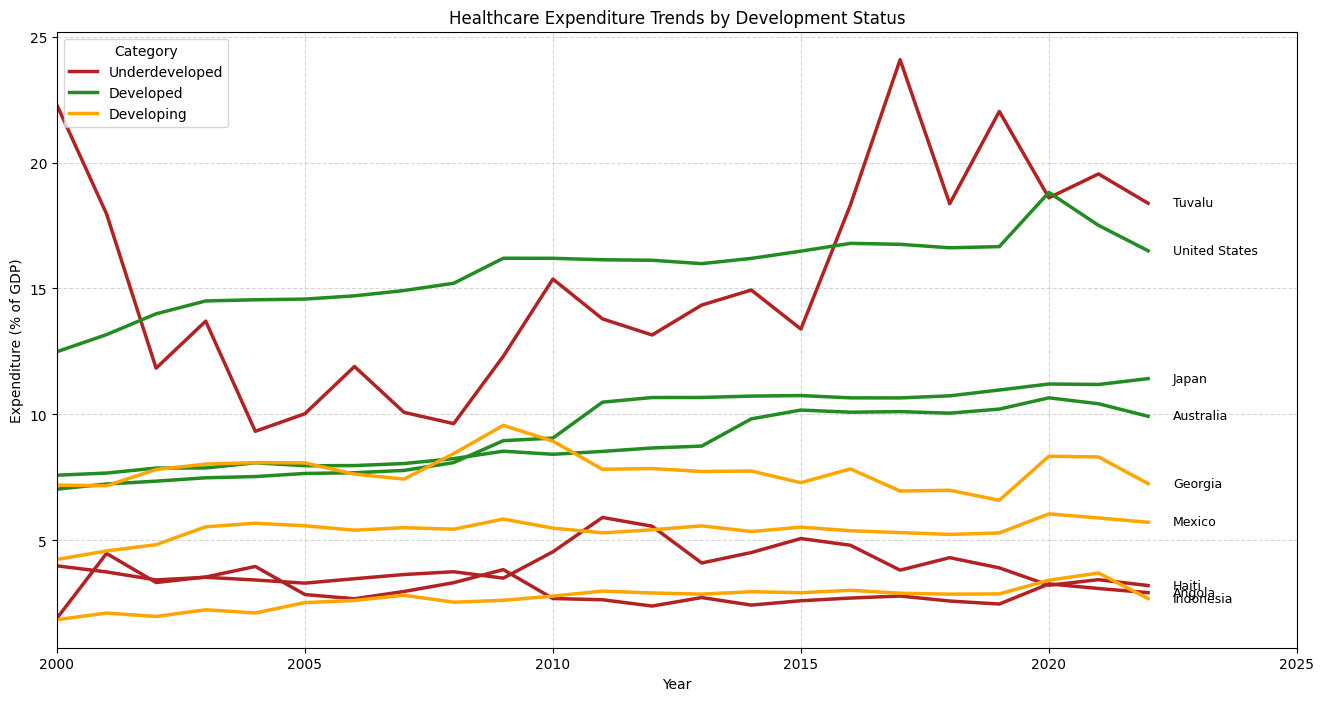

In [ ]:
# create dictionary of countries to be analyzed
country_groups = {
    "USA": "Developed",
    "JPN": "Developed",
    "AUS": "Developed",
    "IDN": "Developing",
    "MEX": "Developing",
    "GEO": "Developing",
    "HTI": "Underdeveloped",
    "TUV": "Underdeveloped",
    "AGO": "Underdeveloped",
}

# Select only the countries in the dictionary above
health_subset = health[health["Country Code"].isin(country_groups.keys())].copy()
health_subset["Category"] = health_subset["Country Code"].map(country_groups)

health_long = health_subset.melt(
    id_vars=["Country Name", "Country Code", "Category"],
    var_name="Year",
    value_name="Expenditure",
)
health_long["Year"] = pd.to_numeric(health_long["Year"], errors="coerce")

# Visualize the chart
plt.figure(figsize=(16, 8))

# Plot Lines
sns.lineplot(
    data=health_long,
    x="Year",
    y="Expenditure",
    hue="Category",
    units="Country Name",
    estimator=None,
    linewidth=2.5,
    palette={
        "Developed": "forestgreen",
        "Developing": "orange",
        "Underdeveloped": "firebrick",
    },
)


for country in health_long["Country Name"].unique():
    # Get data for this country
    c_data = health_long[health_long["Country Name"] == country]

    # Find the row where Year is the Maximum
    end_point = c_data[c_data["Year"] == c_data["Year"].max()]

    # Plot text (Use .values[0] to get the raw number from the row)
    plt.text(
        x=end_point["Year"].values[0] + 0.5,
        y=end_point["Expenditure"].values[0],
        s=country,
        fontsize=9,
        color="black",
        verticalalignment="center",
    )

# Formatting
plt.title("Healthcare Expenditure Trends by Development Status")
plt.ylabel("Expenditure (% of GDP)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(health_long["Year"].min(), health_long["Year"].max() + 3)
plt.legend(title="Category", loc="upper left")

plt.show()


<p>This chart displays the trends in healthcare spending over the last twenty years. It clearly shows that the United States spends much more money than any other nation, reaching over 16 percent of its GDP. In contrast, other developed countries like Japan and Australia remain stable around 10 percent. The graph also highlights that underdeveloped nations such as Tuvalu experience unstable funding with big ups and downs. Meanwhile, developing countries like Indonesia keep their spending low and steady. This data is important for the main research question because it proves that higher spending does not always happen in every rich country, and we must now see if this extra cost actually leads to a longer life.</p>

### 3.2 Visualization of Life Expectancy for selected countries from 2000 - 2022

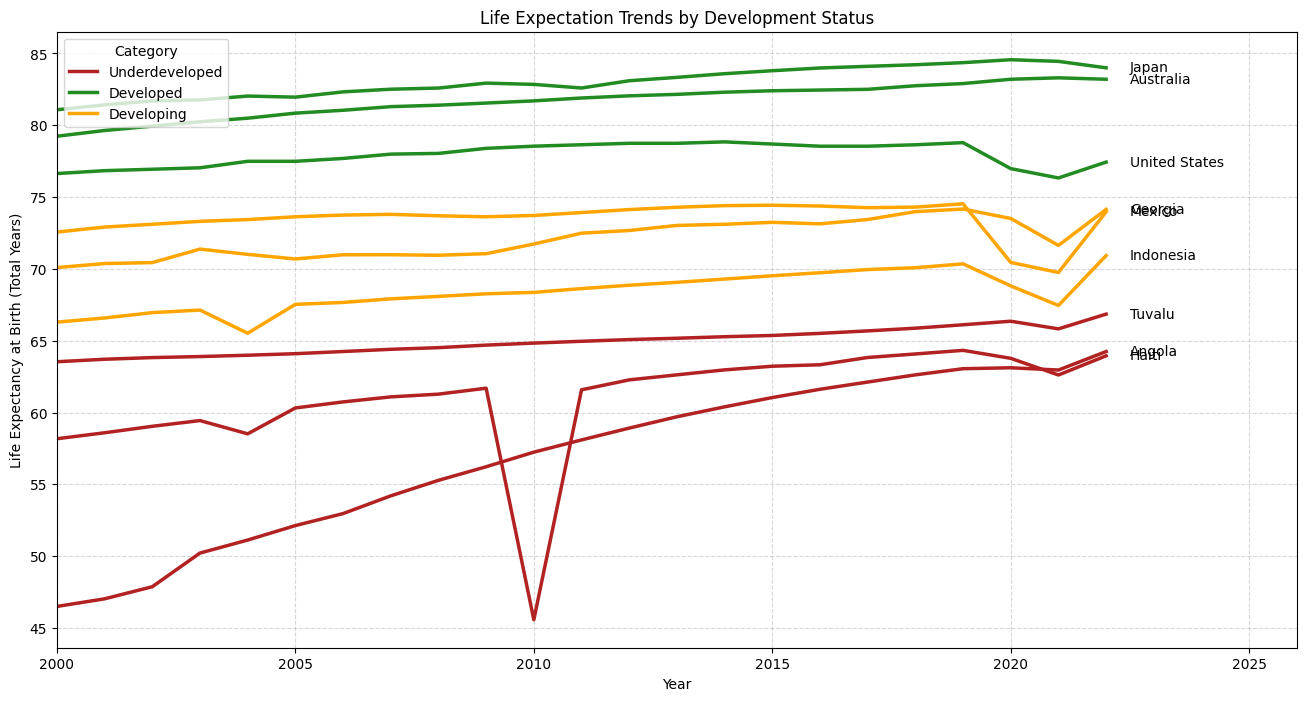

In [67]:
# Select only the countries in the dictionary above
life_subset = life[life["Country Code"].isin(country_groups.keys())].copy()
life_subset["Category"] = life_subset["Country Code"].map(country_groups)

# Melt the data and ensure Year is numeric
life_long = life_subset.melt(
    id_vars=["Country Name", "Country Code", "Category"],
    var_name="Year",
    value_name="Life Expectancy",
)
life_long["Year"] = pd.to_numeric(life_long["Year"], errors="coerce")

# Visualize the chart
plt.figure(figsize=(16, 8))

# Draw Lines
sns.lineplot(
    data=life_long,
    x="Year",
    y="Life Expectancy",
    hue="Category",
    units="Country Name",
    estimator=None,
    linewidth=2.5,
    palette={
        "Developed": "forestgreen",
        "Developing": "orange",
        "Underdeveloped": "firebrick",
    },
)

for country in life_long["Country Name"].unique():
    # Get data for this country
    c_data = life_long[life_long["Country Name"] == country]

    # Find the row where Year is the Maximum for this country
    end_point = c_data[c_data["Year"] == c_data["Year"].max()]

    # Plot text using .values[0] to extract the raw number
    plt.text(
        x=end_point["Year"].values[0] + 0.5,
        y=end_point["Life Expectancy"].values[0],
        s=country,
        color="black",
        fontsize=10,
        verticalalignment="center",
    )

# Formatting
plt.title("Life Expectation Trends by Development Status")
plt.ylabel("Life Expectancy at Birth (Total Years)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(life_long["Year"].min(), life_long["Year"].max() + 4)
plt.legend(title="Category", loc="upper left")
plt.show()

<p>This chart illustrates the trends in life expectancy across different groups of nations over the last two decades. Developed countries like Japan and Australia consistently have the highest life expectancy of over 80 years, but the United States shows a noticeable decline in recent years despite its wealth. Developing nations show steady progress as their lines move upward smoothly. In contrast, underdeveloped countries like Haiti are very unstable and show sudden drops due to specific events (which we don't know). This data relates to the main research question because it highlights the outcomes of health systems. It suggests that simply being a rich country does not always guarantee a continuous rise in life expectancy.</p>

### 3.3 Combined Visualization "Health Expense vs Life Expectancy"

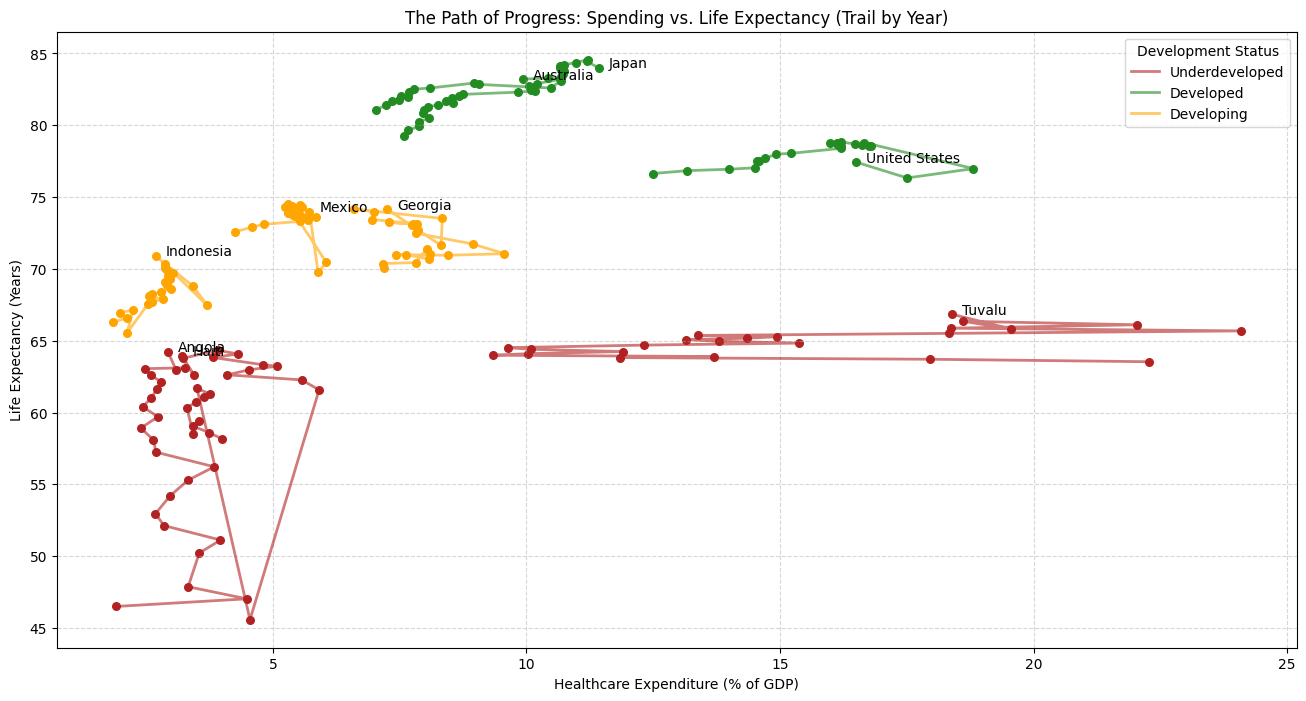

In [68]:
df_combined = pd.merge(
    health_long, life_long, on=["Country Name", "Country Code", "Category", "Year"]
)


plt.figure(figsize=(16, 8))

# Define colors
my_colors = {
    "Developed": "forestgreen",
    "Developing": "orange",
    "Underdeveloped": "firebrick",
}

# Get unique countries
countries_list = df_combined["Country Name"].unique()

for country in countries_list:
    # 1. Create temporary table
    subset = df_combined[df_combined["Country Name"] == country]

    # 2. Sort by Year
    subset = subset.sort_values("Year")

    # 3. Get Category, .values converts the pandas column into a simple list/array
    cat_name = subset["Category"].values[0]
    line_color = my_colors[cat_name]

    # 4. Plot Line
    plt.plot(
        subset["Expenditure"],
        subset["Life Expectancy"],
        color=line_color,
        linewidth=2,
        alpha=0.6,
        label=cat_name,
    )

    # 5. Plot Dots
    plt.scatter(
        subset["Expenditure"], subset["Life Expectancy"], color=line_color, s=30
    )

    # Find the row where the Year equals the maximum year in this subset
    latest_row = subset[subset["Year"] == subset["Year"].max()]

    # Extract the x and y values from that specific row
    # .values[0] ensures we get the actual number, not a Series
    last_x = latest_row["Expenditure"].values[0]
    last_y = latest_row["Life Expectancy"].values[0]

    plt.text(last_x + 0.2, last_y, country, fontsize=10, fontweight="regular")

# Polish the chart
plt.title("The Path of Progress: Spending vs. Life Expectancy (Trail by Year)")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (Years)")
plt.grid(True, linestyle="--", alpha=0.5)

# Fix Legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Development Status")

plt.show()

<p> The chart shows a clear relationship between how much money a country spends and how long its people live. In developing nations like Indonesia and Georgia, the lines show a sharp vertical rise. This demonstrates that a small increase in spending leads to a large improvement in life expectancy. However, this trend changes for developed countries. Nations such as Japan and Australia show a flat line at the top. They continue to spend more money, but their life expectancy does not increase much further. This suggests that after a certain point, extra funding brings smaller rewards. This finding matches with hypothesis above regarding Law of Diminishing Marginal Return</p>

<p> The United States stands out as a major exception to the general trend. Its line moves far to the right side of the graph, which means it has the highest costs. Despite this high spending, the life expectancy in the US is lower than in other developed nations and has even dropped recently. On the other hand, underdeveloped countries like Haiti and Tuvalu show unstable patterns. Their lines are chaotic rather than smooth. This indicates that without a stable economy, high spending does not guarantee better health outcomes.</p>

## 4. Conclusion and Limitations
<p> In conclusion, while this project shows a connection between spending and health, it has some limitations. The analysis only focuses on the total amount of money spent. It does not consider other important factors such as diet, lifestyle, or the quality of the healthcare management. Furthermore, the data only includes a small sample of countries and may not fully represent the global situation. Therefore, more research is needed to understand why some systems are more efficient than others.</p>